<a href="https://colab.research.google.com/github/santapo/DevC-VietNam-Assignments/blob/master/Week5_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)
======

## Data Set

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

## File descriptions

labeledTrainData - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.
## Data fields

* id - Unique ID of each review
* sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
* review - Text of the review

## Objective
Objective of this dataset is base on **review** we predict **sentiment** (positive or negative) so X is **review** column and y is **sentiment** column

## 1. Load Dataset

Let's first of all have a look at the data. You can download the file `labeledTrainData.tsv` on the [Kaggle website of the competition](https://www.kaggle.com/c/word2vec-nlp-tutorial/data), or on our [Google Drive](https://drive.google.com/file/d/1a1Lyn7ihikk3klAX26fgO3YsGdWHWoK5/view?usp=sharing)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import pandas, numpy
import pandas as pd
import numpy as np

In [4]:
# Read dataset with extra params sep='\t', encoding="latin-1"
df = pd.read_csv('/content/drive/My Drive/week5/labeledTrainData.tsv',sep='\t',encoding="latin-1")

In [5]:
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [9]:
# Split data and label
y_train = df['sentiment']
x_train = df.drop(['sentiment'], axis=1)

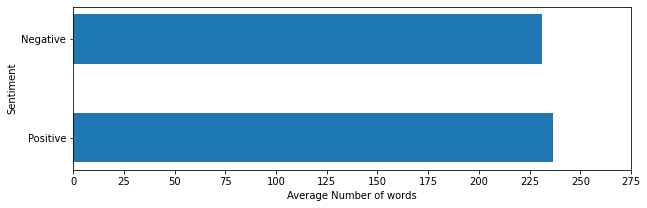

In [12]:
# Check if the dataset is balanced

import matplotlib.pyplot as plt 

# Get mean of positive and negative reviews
avg_pos_reviews = df[df.sentiment==1].review.apply(lambda x: len(x.split())).mean()
avg_neg_reviews = df[df.sentiment==0].review.apply(lambda x: len(x.split())).mean()

plt.figure(figsize=(10, 3))
plt.barh(['Positive', 'Negative'], [avg_pos_reviews, avg_neg_reviews], height=0.5)
plt.xticks(np.arange(0, 300, 25))
plt.xlabel('Average Number of words')
plt.ylabel('Sentiment')
plt.show()

## 2. Data Processing

## main

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

vocab_reduced = Counter()
# Go through all of the items of vocab using vocab.items() and pick only words that are not in 'stop_words' 
# and save them in vocab_reduced
for w, c in vocab.items():
    if not w in stop_words:
        vocab_reduced[w]=c

vocab_reduced.most_common(20)

In [ ]:
# Removing special characters and "trash"
import re 

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

# Create some random texts for testing the function preprocessor()
print(preprocessor('I like it :), |||<><>'))

In [ ]:
# tokenizer and stemming
# tokenizer: to break down our twits in individual words
# stemming: reducing a word to its root
from nltk.stem import PorterStemmer
# Your code here
porter = PorterStemmer()

# Split a text into list of words and apply stemming technic
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]


## Other

In [36]:
# import library
import nltk
import re
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup 

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [27]:
stopwords_list = stopwords.words("english")

no_stopwords = ["not","don't",'aren','don','ain',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
               'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
               "won't", 'wouldn', "wouldn't"]
for no_stopword in no_stopwords:
    stopwords_list.remove(no_stopword)

print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [29]:
# lemmazation

lemmatizer = WordNetLemmatizer()

def lemma_stem_text(words_list):
  text = [lemmatizer.lemmatize(token.lower()) for token in words_list]
  text = [lemmatizer.lemmatize(token.lower(),"v") for token in text]
  return text

In [32]:
# dont => do not

re_negation = re.compile("n't")

def negation_standard(sent):
  sent = re_negation.sub(" not ", sent)
  return sent

In [34]:
def review_cleaning(raw_review):
  # remove HTML tags
  review_text = BeautifulSoup(raw_review).get_text()

  review_text = negation_standard(review_text)

  # remove non-letters and non-numbers
  review_text = re.sub("[^a-zA-Z_0-9]", " ", review_text)

  words = np.char.lower(review_text.split())

  words = [w for w in words if not w in stopwords_list]

  words = lemma_stem_text(words)

  return (" ".join(words))

In [37]:
# Clean first review
clean_review = review_cleaning(x_train["review"][0] )

# Print original review, sentiment and cleaned review
print(f'Text of original review:\n{x_train["review"][0]}\n')
print(f'Sentiment review: {y_train[0]}\n')
print(f'Text of cleaned review:\n{clean_review}') 

Text of original review:
With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film

In [39]:
reviews = x_train['review']

cleaned_train_reviews = []

for i in reviews:
  cleaned_train_reviews.append(review_cleaning(i))

## 3. Create Model and Train 

Using **Pipeline** to concat **tfidf** step and **LogisticRegression** step

In [44]:
# split the dataset in train and test
from sklearn.model_selection import train_test_split

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Import Pipeline, LogisticRegression, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(preprocessor=review_cleaning, max_features=20000, ngram_range = (1,2))

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=20000,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=<function review_cleaning at 0x7fba1b2a8f28>,
                                 smooth_idf=True, stop_words=None,
                                 strip_accents=No...near_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

## 4. Evaluate Model

In [57]:
# Using Test dataset to evaluate model
# classification_report
# confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.892
confusion matrix:
 [[2174  307]
 [ 233 2286]]
classification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      2481
           1       0.88      0.91      0.89      2519

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



## 5. Export Model 

In [58]:
# Using pickle to export our trained model
import pickle
import os
pickle.dump(clf, open('logisticRegression.pkl', 'wb'))

In [ ]:
with open('logisticRegression.pkl', 'rb') as model:
    reload_model = pickle.load(model)
preds = reload_model.predict_proba(twits)
